In [245]:
import librosa
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import os
from PIL import Image 

In [246]:
# file_names = os.listdir('waveform/')    ####### for waveform

# pics = []
# for i in range(1994) : 
#     tmp = cv2.imread('waveform/' + file_names[i])
#     pics.append(tmp)




file_names = os.listdir('spectogram/')

pics = []
for i in range(1994) : 
    tmp = cv2.imread('spectogram/' + file_names[i])
    pics.append(tmp)


In [247]:
for i in range(1994) : 
    pics[i] = pics[i][32:-35, 52:-110]
    #pics[i] = pics[i][40:-40, 55:-45]  ##### for waveform
    pics[i] = cv2.cvtColor(pics[i], cv2.COLOR_BGR2GRAY )



(221, 270)


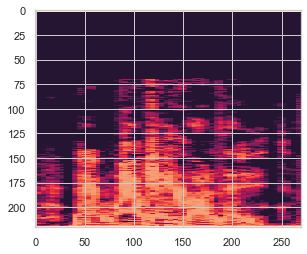

In [248]:
plt.imshow(pics[124])
print(pics[141].shape)

In [249]:
label_dict = {'A':0, 'N':1, 'S':2, 'H':3, 'W':4}
labels = []
for i in range(1994): 
    temp = [0 for i in range(5)] 
    temp[ label_dict[file_names[i][-5]] ] = 1
    labels.append(temp)


In [252]:
pics = np.asarray(pics)
#pics = pics.reshape((1994, 208, 332, 1)) ############ for waveform
pics = pics.reshape((1994, 221, 270, 1))
pics.shape

labels = np.asarray(labels)
labels.shape

(1994, 5)

In [254]:
import seaborn as sns 

sns.set_theme(style="whitegrid")
sns.set_palette('Set2')

In [256]:
resizedPics = []
for i in range(1994) : 
    #resizedPics.append(cv2.resize(pics[i], (52, 86))) ########## for waaveform
    resizedPics.append(cv2.resize(pics[i], (56, 76)))

resizedPics = np.asarray(resizedPics)
resizedPics = resizedPics.reshape((1994, 56, 76, 1))
resizedPics.shape

(1994, 56, 76, 1)

Epoch 1/15
187/187 [==============================] - 5s 25ms/step - loss: 1.7398 - accuracy: 0.2763 - val_loss: 1.4404 - val_accuracy: 0.3226
Epoch 2/15
187/187 [==============================] - 4s 22ms/step - loss: 1.5285 - accuracy: 0.3351 - val_loss: 1.4201 - val_accuracy: 0.3267
Epoch 3/15
187/187 [==============================] - 4s 23ms/step - loss: 1.4976 - accuracy: 0.3385 - val_loss: 1.4205 - val_accuracy: 0.3226
Epoch 4/15
187/187 [==============================] - 4s 23ms/step - loss: 1.4734 - accuracy: 0.3271 - val_loss: 1.4138 - val_accuracy: 0.3226
Epoch 5/15
187/187 [==============================] - 4s 22ms/step - loss: 1.4577 - accuracy: 0.3458 - val_loss: 1.4225 - val_accuracy: 0.3226
Epoch 6/15
187/187 [==============================] - 4s 22ms/step - loss: 1.4458 - accuracy: 0.3344 - val_loss: 1.4092 - val_accuracy: 0.3567
Epoch 7/15
187/187 [==============================] - 4s 22ms/step - loss: 1.4110 - accuracy: 0.3686 - val_loss: 1.4060 - val_accuracy: 0.3267

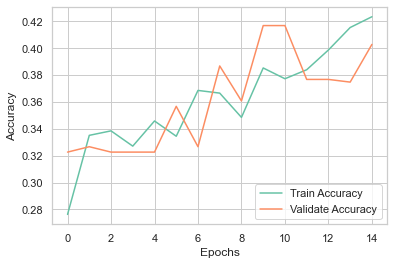

In [262]:
 
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import optimizers 
network = Sequential()


epoch_num = 15

network.add(layers.Conv2D(8, (6, 6), activation='tanh', input_shape=(56, 76, 1), padding='valid'))
network.add(layers.Dropout(0.25))
#network.add(layers.MaxPooling2D((2, 2)))

network.add(layers.Conv2D(16, (6, 6), activation='tanh', padding='valid'))
network.add(layers.Dropout(0.25))
#network.add(layers.MaxPooling2D((2, 2)))

network.add(layers.Conv2D(32, (4, 4), activation='tanh', padding='valid'))
network.add(layers.Dropout(0.25))
#network.add(layers.MaxPooling2D((2, 2)))



network.add(layers.Flatten())
network.add(layers.Dense(64, activation='sigmoid'))
network.add(layers.Dropout(0.5))
network.add(layers.Dense(5, activation='softmax'))

opt = optimizers.Adam(lr=0.00005)
network.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history = network.fit(resizedPics, labels, validation_split=0.25, epochs=epoch_num, batch_size=8)







#-------------------------------------------------------------------PLOTTING---------------------------------------------------------------------



plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train Accuracy', 'Validate Accuracy'], loc='lower right')

network.summary()

In [263]:
def strDemonstration(li) :
    label_dict = {0 : 'Angry', 1 : 'Neutral', 2 : 'Sad', 3 : 'Happy', 4 : 'Wondered'}
    index = li.argmax()
    return label_dict[index]


In [264]:
predictions = network.predict(resizedPics)
real = labels.copy()

confusion1 = []
confusion2 = []

for i in range(1994) : 
    confusion1.append(strDemonstration(real[i]))
    confusion2.append(strDemonstration(predictions[i]))


In [265]:
confusion1 = np.asarray(confusion1)
confusion2 = np.asarray(confusion2)

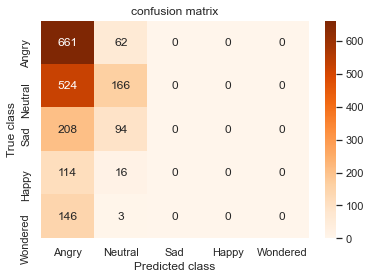

In [266]:
from sklearn.metrics import confusion_matrix

LABELS=["Angry", "Neutral", "Sad", 'Happy', 'Wondered']

conf_matrix = confusion_matrix(confusion1, confusion2, labels=LABELS)

sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d", cmap="Oranges")
plt.title("confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()